# *Importing all libraries*

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import  matplotlib.pyplot as plt
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

## Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
data=pd.read_csv('/content/gdrive/MyDrive/insurance_pred/insurance.csv')
data


Mounted at /content/gdrive


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
print(data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [ ]:
data.describe()

## Preprocessing 

In [3]:
data.smoker = le.fit_transform(data.smoker)
data.sex = le.fit_transform(data.sex)
data.region = le.fit_transform(data.region)
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


## Splitting the data

In [4]:
Y = data.charges
data.drop('charges', axis=1, inplace=True)
X = np.asarray(data)
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size= 0.20, random_state=42)

## Training the model

In [5]:
Model = linear_model.LinearRegression()
Model.fit(X_Train, Y_Train)

LinearRegression()

## Comparing the predicted value

In [6]:
Y_Pred = Model.predict(X_Test)
Y_Test_Pred = pd.DataFrame({"Y_Test": Y_Test, "Y_Pred": Y_Pred})
Y_Test_Pred.head()

,Y_Test,Y_Pred
764,9095.06825,8924.407244
887,5272.17580,7116.295018
890,29330.98315,36909.013521
1293,9301.89355,9507.874691
259,33750.29180,27013.350008


## Ploting a graph of actual and predicted values

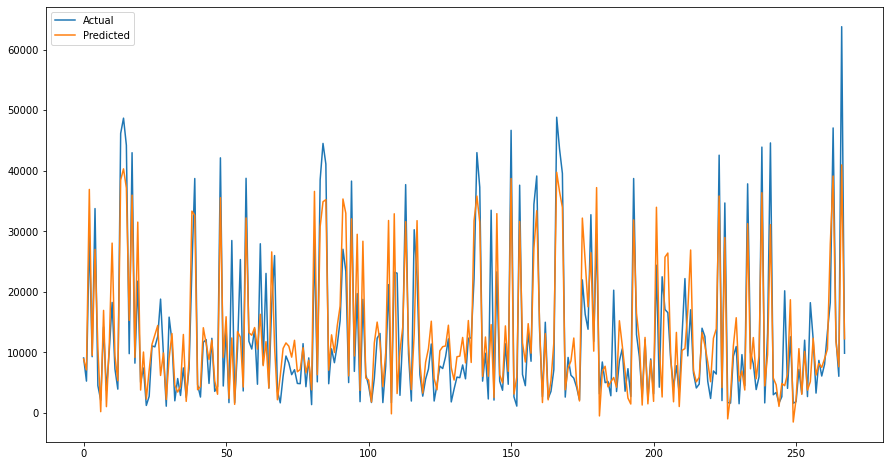

In [7]:
Y_Test_Pred = Y_Test_Pred.reset_index()
plt.figure(figsize=(15, 8))
Y_Test_Pred = Y_Test_Pred.drop(["index"], axis=1)
plt.plot(Y_Test_Pred)
plt.legend(["Actual", "Predicted"])

In [ ]:
Model.score(X_Train, Y_Train)

0.7417049283233981

## Importing anvil library

In [8]:
pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=febaa12b96ecc8915544f27d42653d4af24b23f7ece9767bd6589574984050d9
  Stored in directory: /root/.cache/pip/wheels/e8/9d/fd/0a594a1bc8d493935d319ac40d64d79f5b4117ef4d37b1b678
Successfully built ws4py


## Connecting to the client 

In [11]:
import anvil.server

anvil.server.connect("server_R3WOKPWTYKETN4PEQUG25DXK-CKZ5VJUDXHHDGM5Y")
@anvil.server.callable
def predicting_function(age,sex,bmi,children,smoker,region):
  return int(Model.predict([[age,sex,bmi,children,smoker,region]]))